Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır

En yakındaki K tane komşu bulunur(K'yi biz belirleriz)

En çok hangi gruptan komşu nokta varsa yeni gelen nokta o gruptan kabul edilir

#### örneğin 7 kırmızı üçgen,5 mavi karemiz olsun . yeni gelen yeşil dairenin en yakınında - k=4 için-3 kırmızı üçgen ,1 mavi kare olsun. algoritma yeni gelen yeşil dairenin en yakınında 3 kırmızı üçgen olduğu için yeşil daireye sen kırmızı üçgensin der. :D

Yazılım bunu mesafeleri ölçerek çözer. yeni gelen yeşil dairenin üçgen ve karelere uzaklığını hesaplayarak sınıflandırır.

Yapay Zeka algoritması yeni noktanın hnagi grupta olduğunu bulurken Euclidean Distance hesaplamasını kullanır 

(a,b)=√[(a1 – b1)^2 + (a2 – b2)^2] (kök içinde!)

#### Ex:
#### 768 Hintli kadın hastanın kaydı bulunan gerçek tıp verisetini direkt olarak kullanıcaz.
#### Kaggle'dan aldığımız verisetini iki kısma ayıracağız: 
#### 1.kısım yapay zeka modelimizi (KNN) eğitmek için;
#### 2.kısım modelimizi başarısının % olarak test etmek için kullanacağız.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv("diabetes.csv") #verisetimizi dahil ettik
df.head() #ilk 5 veriyi gösterir
# outcome=1 diyabet hastası
# outcome=0 sağlıklı

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


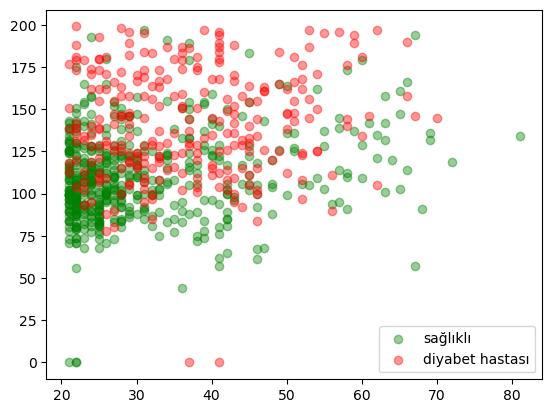

In [11]:
sekerHastalari=df[df.Outcome==1]
saglikliInsanlar=df[df.Outcome==0]
#pandas kullanark sağlıklıları ve hastaları ayrı ayrı listeledik

#şimdilik sadece glukoz değerine bakarak bir örnek çiizm yapalım
plt.scatter(saglikliInsanlar.Age,saglikliInsanlar.Glucose,color="green",label="sağlıklı",alpha=0.4)
plt.scatter(sekerHastalari.Age,sekerHastalari.Glucose, color="red",label="diyabet hastası",alpha=0.4)
plt.xlabel=("Age")
plt.llabel=("Glocuse")
plt.legend()
plt.show()

In [12]:
# x ve y eksenlerini belirleyelim
y=df.Outcome.values #verisetini ikiye ayırmak gerek burda y değerine outcome değerini atadık yani 0 mı 1 mi,hasta mı değil mi
x_ham_veri=df.drop(["Outcome"],axis=1) #outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
#çünkü KNN algoritması x değerleri içerisinde gruplandırma yapacak

#normaizition yapmalıyız. x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
#eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamarı ever v KNN algoritmasını yanıltabilir
x=(x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

#önce
print("normalizition öncesi ham veriler:\n")
print(x_ham_veri.head())

#sonra
print("normalizition sonrası yapay zekayı eğitmek için verilen ham veriler:\n")
print(x.head())
# alttaki veriler sonrası görebiliriz ki normalizition yaparak verileri 0 ile 1 arası tutabiliriz
# ve böylece pisagor bağlantısı daha kolay tutulabilir
#örneğin üçgende bir kenarım 2 bir kenarım 180 iken bağlantı algoritmamızı yanıltabilirdi

normalizition öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
normalizition sonrası yapay zekayı eğitmek için verilen ham veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.

C:\Users\90541\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\90541\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\90541\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
#train verimiz ile test verimizi ayırıyoruz
#train verimiz sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
#test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıkl insanları -
#ayırt edebiliyor mu diye test etmek için kullanılacak 

#test verimiz verisetindeki verilerin %20 sini kullanmasını istedik. yani train verimiz %80i test verimiz %20yi kullanıcack
#random_state=1 bu verileri veriseti içinden random olarak al demek yani aynı veriye denk gelmesi imkansız
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) 

#knn modelimizi oluşturalım
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbor=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("k=3 için test verilerimizin doğrulama testi sonucu ",knn.score(x_test,y_test))


k=3 için test verilerimizin doğrulama testi sonucu  0.7857142857142857


In [16]:
#k kaç olmalı? en iyi k değerini belirleyelim
sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk oranı: %",knn_yeni.score(x_test,y_test)*100)
    sayac+=1
# bu koda bakarak en yğksek başarıyı 7 komşuya bakarak bulduğunu görebiliriz

1   Doğruluk oranı: % 69.48051948051948
2   Doğruluk oranı: % 74.02597402597402
3   Doğruluk oranı: % 78.57142857142857
4   Doğruluk oranı: % 75.97402597402598
5   Doğruluk oranı: % 79.87012987012987
6   Doğruluk oranı: % 79.22077922077922
7   Doğruluk oranı: % 81.16883116883116
8   Doğruluk oranı: % 79.22077922077922
9   Doğruluk oranı: % 78.57142857142857
10   Doğruluk oranı: % 79.22077922077922
